  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Positive fractal dimension range: 0.5056146761642473 to 1.1264960925018574
{'../data\\control\\r02c08f04p01-ch2sk1fk1fl1.tiff'}

Component 4 features: {'area': 764, 'perimeter': 259.664, 'num_projections_v2': 5, 'projection_lengths': [21.192, 1.707, 7.95, 13.778, 14.778], 'circularity': 0.142, 'neighbors': 2, 'length_width_ratio': 1.133, 'fractal_dim': 0.657}


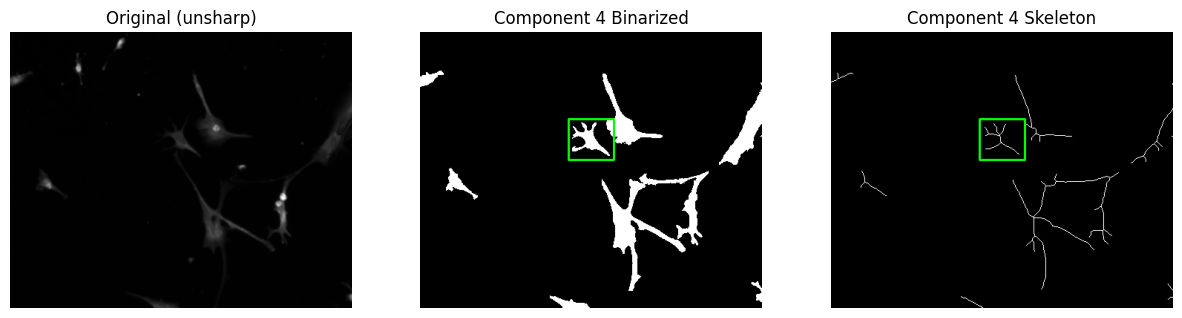

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Positive fractal dimension range: 0.22606923488367855 to 1.1440951786307862
{'../data\\treatment1\\r05c02f04p01-ch2sk1fk1fl1.tiff'}

Component 6 features: {'area': 188, 'perimeter': 123.841, 'num_projections_v2': 2, 'projection_lengths': [5.5, 6.95], 'circularity': 0.154, 'neighbors': 0, 'length_width_ratio': 1.55, 'fractal_dim': 0.416}


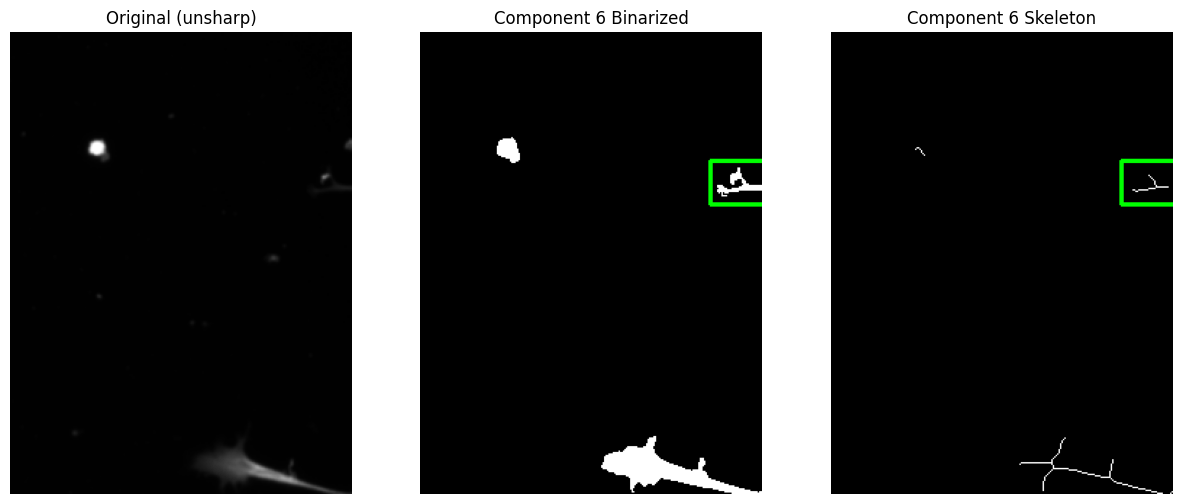

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from binarize_and_skeletonize import *
from extract_features import *

def visualize_component(folder, image_index, component_index, filter_feats=False):
    input_folder = os.path.join("../data", folder)
    image_files = sorted([f for f in os.listdir(input_folder) if f.endswith(".tiff")])
    image_name = image_files[image_index]
    input_path = os.path.join(input_folder, image_files[image_index])

    original_img, binarized = binarize(input_path)
    binarized_img = cv2.cvtColor(binarized, cv2.COLOR_GRAY2RGB)

    skeleton = skeletonize_and_prune(original_img, binarized, prune_size=10)
    skeleton_img = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2RGB)\
    
    features = extract_features(binarized, skeleton, image_name=image_name)

    region_mask = features[component_index]['mask']
    region_comp = features[component_index]['component']

    # Find the bounding box coordinates
    x, y, w, h = cv2.boundingRect(region_mask)
    x -= 5; y -= 5; w += 10; h += 10

    # Cropping
    crop_padding = 200 
    crop_x = max(max(x, 0) - crop_padding, 0); crop_y = max(max(y, 0) - crop_padding, 0)
    crop_w = min(x + min(w, skeleton.shape[1] - x) + crop_padding, skeleton.shape[1]) - crop_x
    crop_h = min(y + min(h, skeleton.shape[0] - y) + crop_padding, skeleton.shape[0]) - crop_y

    # Draw the bounding box in green (for example)
    cv2.rectangle(skeleton_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(binarized_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    if filter_feats:
        feats = ['area', 'perimeter', 'num_projections_v2', 'projection_lengths', 'circularity',
                'neighbors', 'length_width_ratio', 'fractal_dim']
        features = {
            key: [round(x, 3) if isinstance(x, (int, float)) else x for x in features[component_index][key]]
            if isinstance(features[component_index][key], list)
            else round(features[component_index][key], 3)
            for key in feats
        }
    else:
        features = {
            key: round(value, 3) if isinstance(value, (int, float)) else value
            for key, value in list(features[component_index].items())[:-1]
        }
    #print(f"Component {region_comp} features: {features_filtered}")
    
    print({input_path})
    print(f"\n\033[1mComponent {region_comp} features: {features}\033[0m")
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))

    ax[0].imshow(original_img[crop_y:crop_y+crop_h, crop_x:crop_x+crop_w], cmap="gray")
    ax[0].set_title("Original (unsharp)")
    ax[0].axis("off")

    ax[1].imshow(binarized_img[crop_y:crop_y+crop_h, crop_x:crop_x+crop_w])
    ax[1].set_title(f"Component {region_comp} Binarized")
    ax[1].axis('off')

    ax[2].imshow(skeleton_img[crop_y:crop_y+crop_h, crop_x:crop_x+crop_w])
    ax[2].set_title(f"Component {region_comp} Skeleton")
    ax[2].axis('off')

    plt.show()


visualize_component(folder = "control", image_index = 1, component_index = 3, filter_feats=True)
visualize_component(folder = "treatment1", image_index = 3, component_index = 5, filter_feats=True)